<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Quantum Computing and Quantum Machine Learning, Project 1 -->

## Part g)

Use now the VQE method to find the same eigenvalues as in part f) and
set up the circuits and simulations which are needed. Compare your
results with those from part f) and comment your results.

<span style="color:red">Solution:</span>

**Writing the hamiltonian via Pauli matrices for $J = 1$ and $N = 2$**

$$\begin{equation}
H = \frac{\epsilon}{2}\left(\sigma_{z}\otimes \mathbb{1} + \mathbb{1}\otimes \sigma_{z} \right) - \frac{V}{2}\left(\sigma_{x}\otimes \sigma_{x} - \sigma_{y}\otimes \sigma_{y} \right)
\end{equation}
$$

Quantum Circuit:


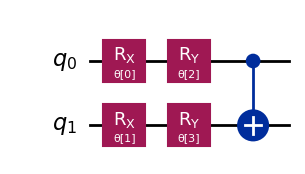

Energy: -1.1180339798148118
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Optimal parameters θ[0,1,2,3]: [3.14161678 3.14161514 5.17593344 3.14168761]
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [1]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler, Estimator

E= 0.5
V = 1.0 
ansatz = TwoLocal(2, ['rx','ry','cx'], 'cx','linear', reps=0)
op = SparsePauliOp.from_list([('ZI',E*0.5), ('IZ',E*0.5), ('XX',-V*0.5), ('YY',V*0.5)])

estimator = Estimator() 
optimizer = COBYLA() 
 
vqe = VQE(estimator, ansatz, optimizer) 
result = vqe.compute_minimum_eigenvalue(operator=op) 
eigenvalue = result.eigenvalue

print("Quantum Circuit:")
display(ansatz.decompose().draw('mpl'))
print("Energy:",eigenvalue)
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("Optimal parameters θ[0,1,2,3]:",result.optimal_point)
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")

Setting up the circuit to perform measurements

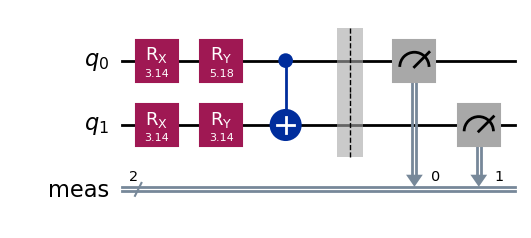

In [2]:
from qiskit import QuantumCircuit
import qiskit_aer
from qiskit.visualization import plot_histogram
import numpy as np

backend = qiskit_aer.Aer.get_backend('qasm_simulator')

qr = QuantumCircuit(2)
qr.rx(result.optimal_point[0],0)        # rotational x for the first qubit
qr.ry(result.optimal_point[2],0)        # rotational y for the first qubit
qr.rx(result.optimal_point[1],1)        # rotational x for the second qubit
qr.ry(result.optimal_point[3],1)        # rotational y for the second qubit
qr.cx(0, 1) 

qr.measure_all()
qr.draw(output="mpl")

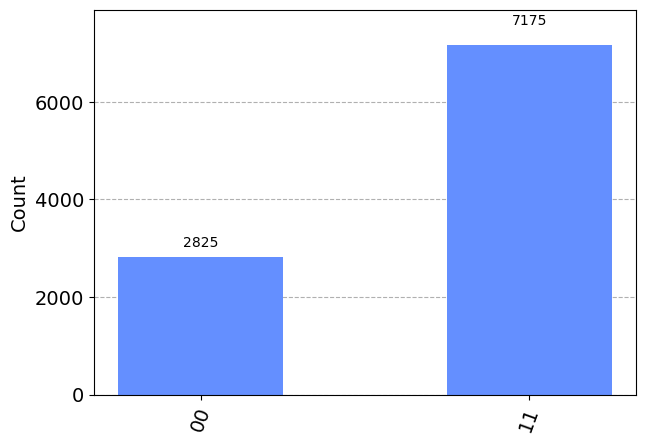

In [3]:
job = backend.run(qr, shots=10000)
result = job.result()

counts = result.get_counts(qr)
plot_histogram(counts)

**Writing the hamiltonian in terms of Pauli matrices for $J = 2$ and $N = 4$**

$$\begin{equation}
H = \frac{\epsilon}{2}\left(\sigma_{z}\otimes \mathbb{1}\otimes \mathbb{1}\otimes \mathbb{1} + \mathbb{1}\otimes \sigma_{z} \otimes \mathbb{1}\otimes \mathbb{1} + \mathbb{1}\otimes \mathbb{1}\otimes \sigma_{z}\otimes \mathbb{1} + \mathbb{1}\otimes \mathbb{1}\otimes \mathbb{1}\otimes \sigma_{z} \right)
- \frac{V}{2}(\sigma_{x}\otimes \sigma_{x}\otimes \mathbb{1}\otimes \mathbb{1} + \sigma_{x}\otimes \mathbb{1}\otimes \sigma_{x}\otimes \mathbb{1} + \mathbb{1}\otimes \sigma_{x}\otimes \sigma_{x}\otimes \mathbb{1} +
\end{equation}
$$

$$ \begin{equation}
+ \mathbb{1}\otimes \sigma_{x}\otimes \mathbb{1} \otimes \sigma_{x} + \mathbb{1}\otimes \mathbb{1}\otimes \sigma_{x}\otimes \sigma_{x} + \sigma_{x}\otimes \mathbb{1}\otimes \mathbb{1}\otimes \sigma_{x})
+ \frac{V}{2} ( \sigma_{y}\otimes \sigma_{y}\otimes \mathbb{1}\otimes \mathbb{1} + \sigma_{y}\otimes \mathbb{1}\otimes \sigma_{y}\otimes \mathbb{1} + \mathbb{1}\otimes \sigma_{y}\otimes \sigma_{y}\otimes \mathbb{1} + \mathbb{1}\otimes \sigma_{y}\otimes \mathbb{1} \otimes \sigma_{y} +
\end{equation}
$$

$$ \begin{equation}
+ \mathbb{1}\otimes \mathbb{1}\otimes \sigma_{y}\otimes \sigma_{y} + \sigma_{y}\otimes \mathbb{1}\otimes \mathbb{1}\otimes \sigma_{y})
\end{equation}
$$

Quantum Circuit:


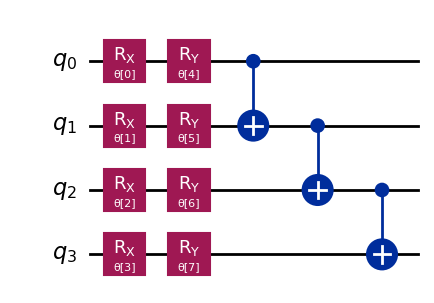

Energy: -3.2098253860742014
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
Optimal parameters θ[0,1,2,3,4,5,6,7]: [ 6.28317205e+00  3.14167495e+00 -3.16200315e-05  3.14161158e+00
  1.78376152e+00  4.44710106e+00 -4.93327926e+00  4.47060189e+00]
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------


In [4]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.minimum_eigensolvers import VQE
#from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal
from qiskit.primitives import Sampler, Estimator 
#from qiskit_aer.primitives import Estimator

E= 0.5
V = 1.0 
entangler_map = [[0, 1], [1, 2], [2, 3]]
ansatz = TwoLocal(4, ['rx','ry'], 'cx',entangler_map,skip_final_rotation_layer=True, reps=1) # parameter_prefix='θ'
op = SparsePauliOp.from_list([('ZIII',E*0.5), ('IZII',E*0.5), ('IIZI',E*0.5), ('IIIZ',E*0.5),
                             ('XXII',-V*0.5), ('XIXI',-V*0.5), ('IXXI',-V*0.5), ('IXIX',-V*0.5), ('IIXX',-V*0.5), ('XIIX',-V*0.5),
                             ('YYII',V*0.5), ('YIYI',V*0.5), ('IYYI',V*0.5), ('IYIY',V*0.5), ('IIYY',V*0.5), ('YIIY',V*0.5)])

estimator = Estimator() 
optimizer = COBYLA() 
 
vqe = VQE(estimator, ansatz, optimizer) 
result = vqe.compute_minimum_eigenvalue(operator=op) 
eigenvalue = result.eigenvalue

print("Quantum Circuit:")
display(ansatz.decompose().draw('mpl'))
print("Energy:",eigenvalue)
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")
print("Optimal parameters θ[0,1,2,3,4,5,6,7]:",result.optimal_point)
print("--------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------------------------------------------------------------------------")

Setting up the circuit to perform mesurements

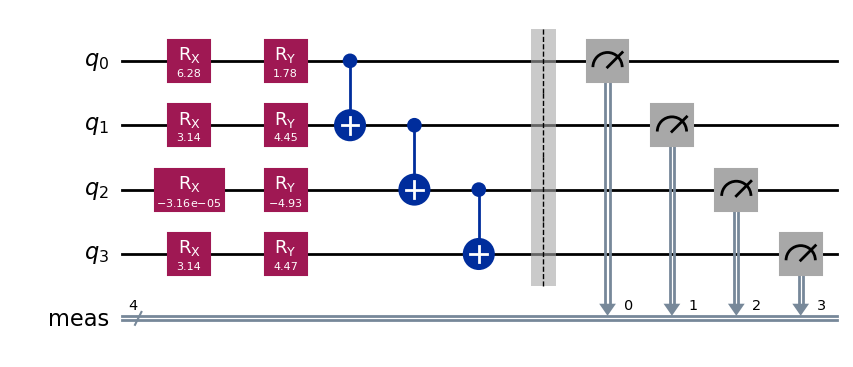

In [5]:
from qiskit import QuantumCircuit
import qiskit_aer
from qiskit.visualization import plot_histogram
import numpy as np

backend = qiskit_aer.Aer.get_backend('qasm_simulator')

qr = QuantumCircuit(4)
qr.rx(result.optimal_point[0],0)        # rotational x for the first qubit
qr.ry(result.optimal_point[4],0)        # rotational y for the first qubit
qr.rx(result.optimal_point[1],1)        # rotational x for the second qubit
qr.ry(result.optimal_point[5],1)        # rotational y for the second qubit
qr.cx(0, 1)               # CNOT gate
qr.rx(result.optimal_point[2],2)        # rotational x for the first qubit
qr.ry(result.optimal_point[6],2)        # rotational y for the first qubit
qr.cx(1, 2)               # CNOT gate
qr.rx(result.optimal_point[3],3)        # rotational x for the first qubit
qr.ry(result.optimal_point[7],3)        # rotational y for the first qubit
qr.cx(2, 3)               # CNOT gate

qr.measure_all()
qr.draw(output="mpl")

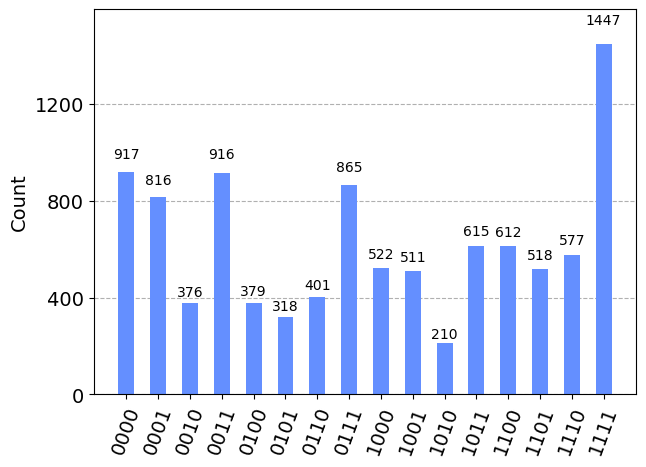

In [6]:
job = backend.run(qr, shots=10000)
result = job.result()
counts = result.get_counts(qr)

plot_histogram(counts)
